## Task 12. Histogram


<u>By using <i><strong>CuPy</strong></i>:</u>
* Implement the suggested function:
$$
 f(x) = (z^2(x) + z^3(x) - 200 \,\, z^4(x) )\,\,\sin(\,\,100000\,\,(x + 0.5)\,\,),
 \\
 \text{where    }\:\:\: z(x) = \sin(3\,\,x)-0.5
$$
* Plot function on the $x$ interval $[0,\,\, 1]$. Number of points = 10000000.
* Get minimal and maximal values of function on the interval $[0,\,\, 1]$: $f_{min}$ and $f_{max}$.
* Divide $y=f(x), \: (x \in [0,\,\, 1]) \:$ interval $[f_{min}, f_{max}]$ into $10$ $y=f(x)$ subintervals of length $\delta$ equal to $0.1 \,\, (f_{max}-f_{min})$: $[f_{min},\,\, f_{min} + \delta],\,\, [f_{min}+ \delta,\,\, f_{min} + 2 \,\, \delta],\,\, \dots,\,\, [f_{max}- \delta,\,\, f_{max}]$.
* Compute number of $y=f(x), \: (x \in [0,\,\, 1]) \:$ values in each subinterval. Use $\operatorname{cp.sum(\dots)}$
* Plot histogram. <strong>[Hint: how to represent the histogram](https://cdn.datamentor.io/wp-content/uploads/2017/11/r-histogram.png)</strong>

<strong >Hint about function $f(x)$ appearance:</strong>
    ![Hint](Hint.png)

In [6]:
pip install cupy-cuda111

In [2]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt

* Implement the suggested function:
$$
 f(x) = (z^2(x) + z^3(x) - 200 \,\, z^4(x) )\,\,\sin(\,\,100000\,\,(x + 0.5)\,\,),
 \\
 \text{where    }\:\:\: z(x) = \sin(3\,\,x)-0.5
$$

In [3]:
def f(x):
    z = cp.sin(3*x) - 0.5
    return (z**2 + z**3 - 200 * z**4) * cp.sin(100000 * (x + 0.5))

* Plot function on the $x$ interval $[0,\,\, 1]$. Number of points = 10000000.

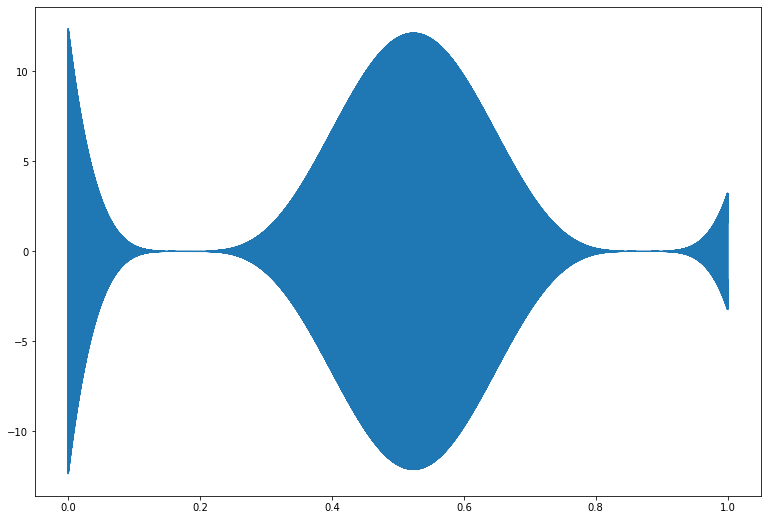

In [5]:
l = cp.linspace(0, 1, num=10_000_000)
f_l=f(l)
plt.figure(figsize=(13, 9))
plt.plot(l.get(), f_l.get())
plt.show()

* Get minimal and maximal values of function on the interval $[0,\,\, 1]$: $f_{min}$ and $f_{max}$.

In [6]:
f_l_min = float(f_l.min())
f_l_max = float(f_l.max())

* Divide $y=f(x), \: (x \in [0,\,\, 1]) \:$ interval $[f_{min}, f_{max}]$ into $10$ $y=f(x)$ subintervals of length $\delta$ equal to $0.1 \,\, (f_{max}-f_{min})$: $[f_{min},\,\, f_{min} + \delta],\,\, [f_{min}+ \delta,\,\, f_{min} + 2 \,\, \delta],\,\, \dots,\,\, [f_{max}- \delta,\,\, f_{max}]$.

In [13]:
delta = 0.1 * (f_l_max - f_l_min)
print(f'delta = {delta}')
subintervals_arr=cp.empty((10,2))
for i in range(10):
    subintervals_arr[i]=cp.array([f_l_min+delta*i,f_l_min+delta*(i+1)])

delta = 2.4740456960239334


In [14]:
subintervals_arr

array([[-1.23655447e+01, -9.89149897e+00],
       [-9.89149897e+00, -7.41745327e+00],
       [-7.41745327e+00, -4.94340758e+00],
       [-4.94340758e+00, -2.46936188e+00],
       [-2.46936188e+00,  4.68381395e-03],
       [ 4.68381395e-03,  2.47872951e+00],
       [ 2.47872951e+00,  4.95277521e+00],
       [ 4.95277521e+00,  7.42682090e+00],
       [ 7.42682090e+00,  9.90086660e+00],
       [ 9.90086660e+00,  1.23749123e+01]])

* Compute number of $y=f(x), \: (x \in [0,\,\, 1]) \:$ values in each subinterval. Use $\operatorname{cp.sum(\dots)}$

In [16]:
sum_arr = cp.empty(10)
for i in range(10):
    sum_arr[i]=cp.sum(cp.logical_and(f_l >= subintervals_arr[i,0], f_l <= subintervals_arr[i,1]))

* Plot histogram. <strong>[Hint: how to represent the histogram](https://cdn.datamentor.io/wp-content/uploads/2017/11/r-histogram.png)</strong>

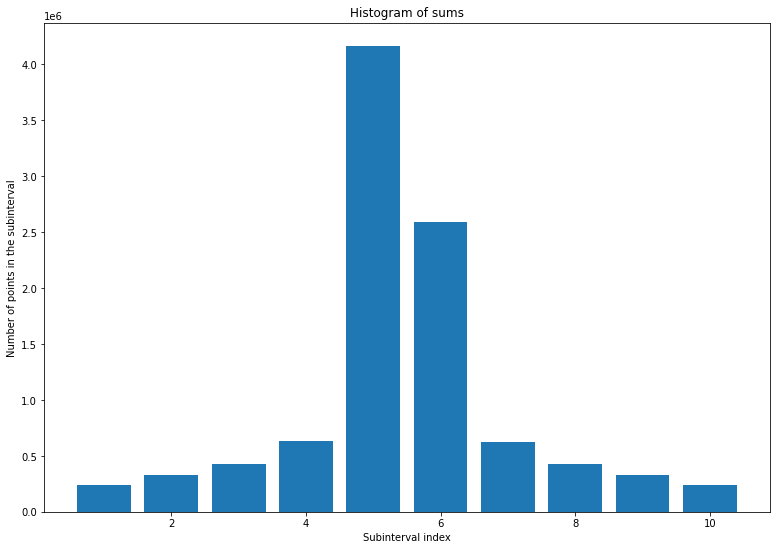

In [17]:
plt.figure(figsize=(13, 9))
plt.bar(range(1, 11), sum_arr.get())
plt.title('Histogram of sums')
plt.xlabel('Subinterval index')
plt.ylabel('Number of points in the subinterval');
plt.show()

Computation time

In [20]:
test_arr_np = np.random.rand(10_000_000)
test_arr_cp = cp.random.rand(10_000_000)

time_np = %timeit -o -r 3 -n 1000 np.sum(test_arr_np)
time_np = time_np.best

time_cp = %timeit -o -r 3 -n 1000 np.sum(test_arr_cp)
time_cp = time_cp.best

1000 loops, best of 3: 8.04 ms per loop
The slowest run took 315.98 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 30.3 µs per loop


In [21]:
print(f'time_np = {time_np}, time_cp = {time_cp}, time_np/time_cp = {time_np/time_cp}')

time_np = 0.008040394924999987, time_cp = 3.0326775000048654e-05, time_np/time_cp = 265.1252869778302
